___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, XGBoost,and Neural Network*** algorithms and ***Unbalanced Data Techniques*** . Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***other libraries*** in a variety of ways.

Data drift and model drirft are key consepts about ML and MLOPS, you can monitor and check your data and models with plenty of ways and tools. ***Deepchecks*** is one of them and the leading tool for testing and for validating your machine learning models and data, and it enables doing so with minimal effort. In this project, you will apply ***Data Integrity, Train-Test Validation, and Model Evaluation*** checks.
Deepchecks Introduction : https://youtu.be/7ELdizoi6BU

At the end of the project, you will have the opportunity to deploy your model by ***Streamlit API***.

Before diving into the project, please take a look at the Determines and Tasks.

---
---


# #Determines
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

**Feature Information:**

**Time**: This feature is contains the seconds elapsed between each transaction and the first transaction in the dataset.

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning.

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can display the distribution of the target variable's classes over other variables.
Also, it is useful to take missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with.

Start with Logistic Regression and evaluate model performance. You will apply the Unbalanced Data Techniques used to increase the performance. Next, observe their effects.

Then, you will use four different algorithms in the model building phase.

In the final step, you will deploy your model using ***Streamlit API***.

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Apply data integrity checks
- Exploratory Data Analysis
- Data Cleaning
    
#### 2. Data Preprocessing

- Train - Test Split
- Train - Test Split Validation Checks
- Scaling

#### 3. Model Building

- Logistic Regression
- Random Forest Classifier
- XGBoost Classifier
- Neural Network
-

#### 4. Model Deployement

- Save and Export the Best Model
- Save and Export Variables




---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 14.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
Husam = '/content/drive/MyDrive/Colab Notebooks/Datasets/creditcard.csv'
Afnan = '/content/drive/MyDrive/Capstone_Projects/Project_Three_Fraud_Detection/creditcard.csv'
sarah='/content/drive/MyDrive/creditcard.csv'

In [ ]:
df = pd.read_csv(sarah)

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


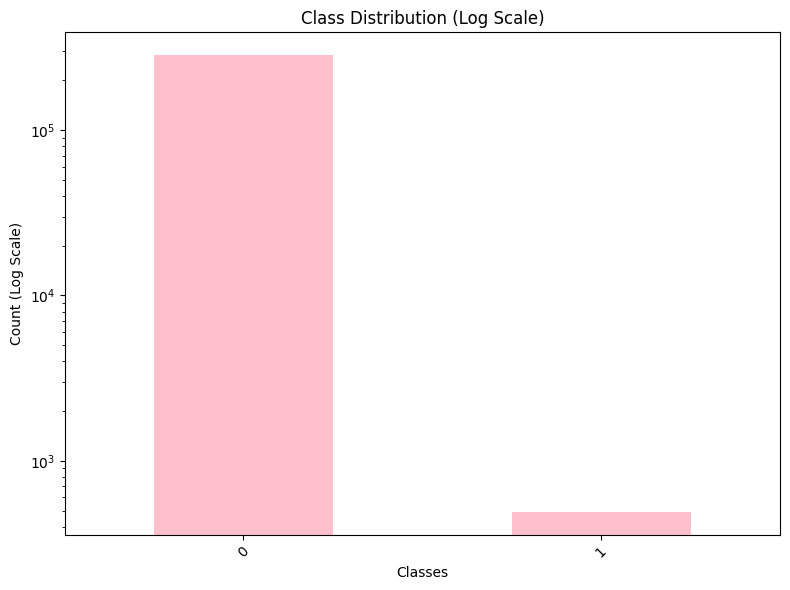

In [ ]:
class_counts = df['Class'].value_counts()

plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='pink')
plt.yscale('log')  # Set y-axis scale to logarithmic
plt.title('Class Distribution (Log Scale)')
plt.xlabel('Classes')
plt.ylabel('Count (Log Scale)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

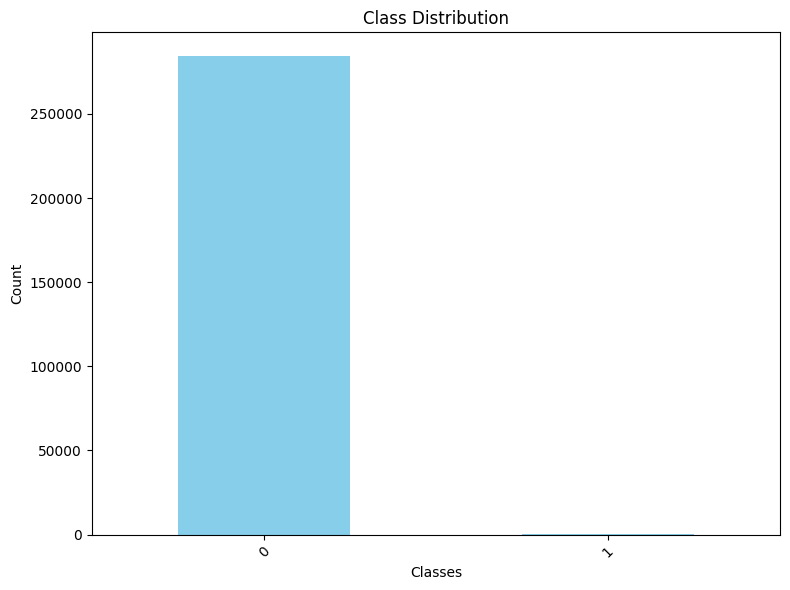

In [ ]:
class_counts = df['Class'].value_counts()

# Plotting the class distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

In [ ]:
df_copy = df.copy()

## Apply Data Integrity Checks
* link: https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_data_integrity.html

In [ ]:
!pip install deepchecks
!pip install numba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 43.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.8 MB/s eta 0:00:00
  Created wheel for PyNomaly: filename=PyNomaly-0.3.3-py3-none-any.whl size=8480 sha256=3144e14bfc44d5bff54fd5c225f9265adb97eb65c800ad9e1349e5ddf244e3ae
  Stored in directory: /root/.cache/pip/wheels/2b/49/68/62eb262833c0fd5403d3b258bd259b0f71516d2563a960303f
Successfully built PyNomaly
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fast

In [ ]:
#  Data Integrity Checks
import sys
from deepchecks.tabular.suites import data_integrity
from deepchecks.tabular import Dataset
from deepchecks.tabular.checks import IsSingleValue, DataDuplicates

In [ ]:
ds = Dataset(df)

deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 1 categorical features were inferred.: Class


In [ ]:
# Run Suite:
integ_suite = data_integrity()
suite_result = integ_suite.run(ds)
suite_result.show()

<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2023 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Data Integrity Suite

as we can see we have some duplictes and some outliers

### Exploratory Data Analysis

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

### Data Cleaning
Check Missing Values and Outliers

In [ ]:
df.duplicated().sum()

1081

In [ ]:
df.isna().sum().sum()

0

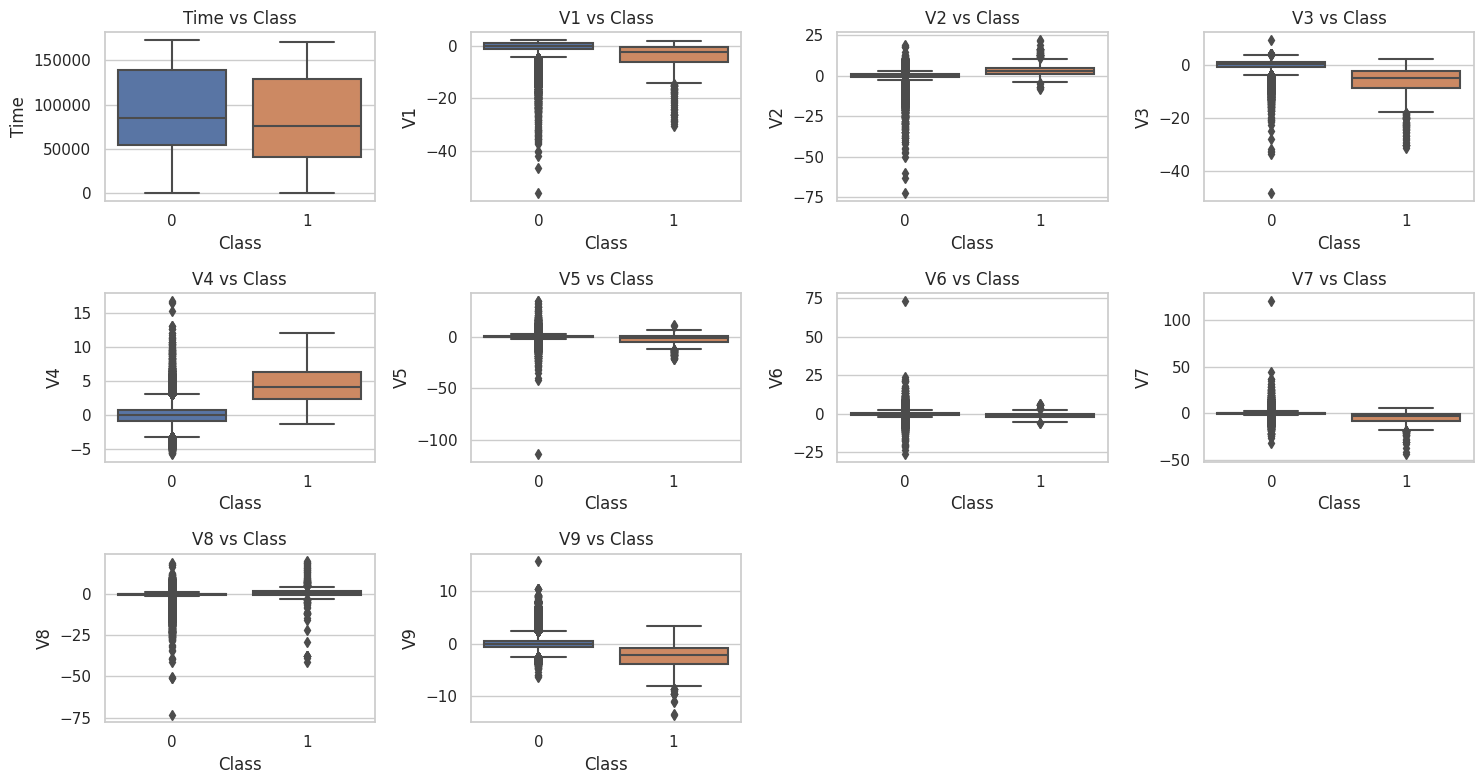

In [ ]:
# Extract numerical features for box plots
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns[:10]


sns.set(style="whitegrid")

# Create box plots for each numerical feature
plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x='Class', y=feature, data=df)
    plt.title(f'{feature} vs Class')

plt.tight_layout()
plt.show()

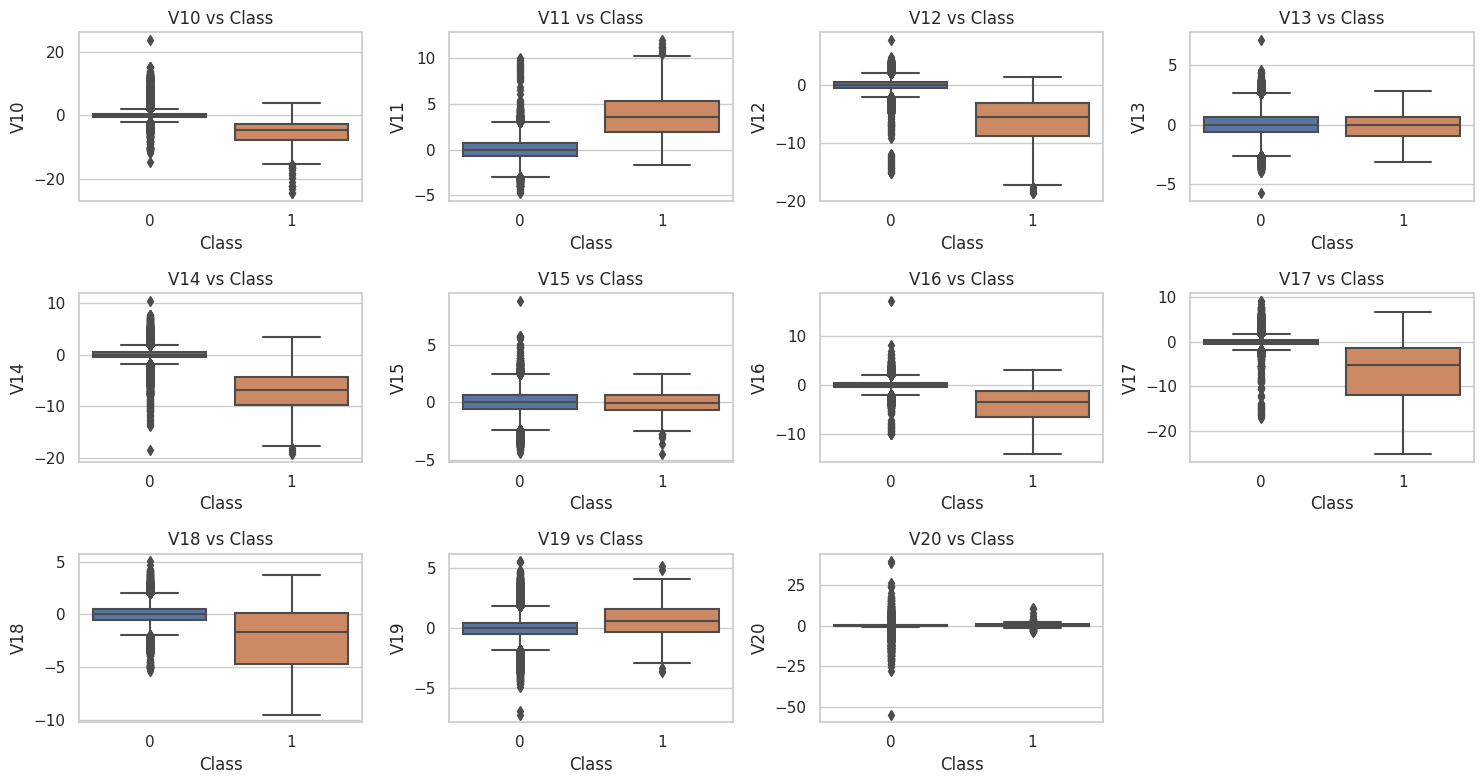

In [ ]:

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns[10:21]


sns.set(style="whitegrid")

# Create box plots for each numerical feature
plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x='Class', y=feature, data=df)
    plt.title(f'{feature} vs Class')

plt.tight_layout()
plt.show()

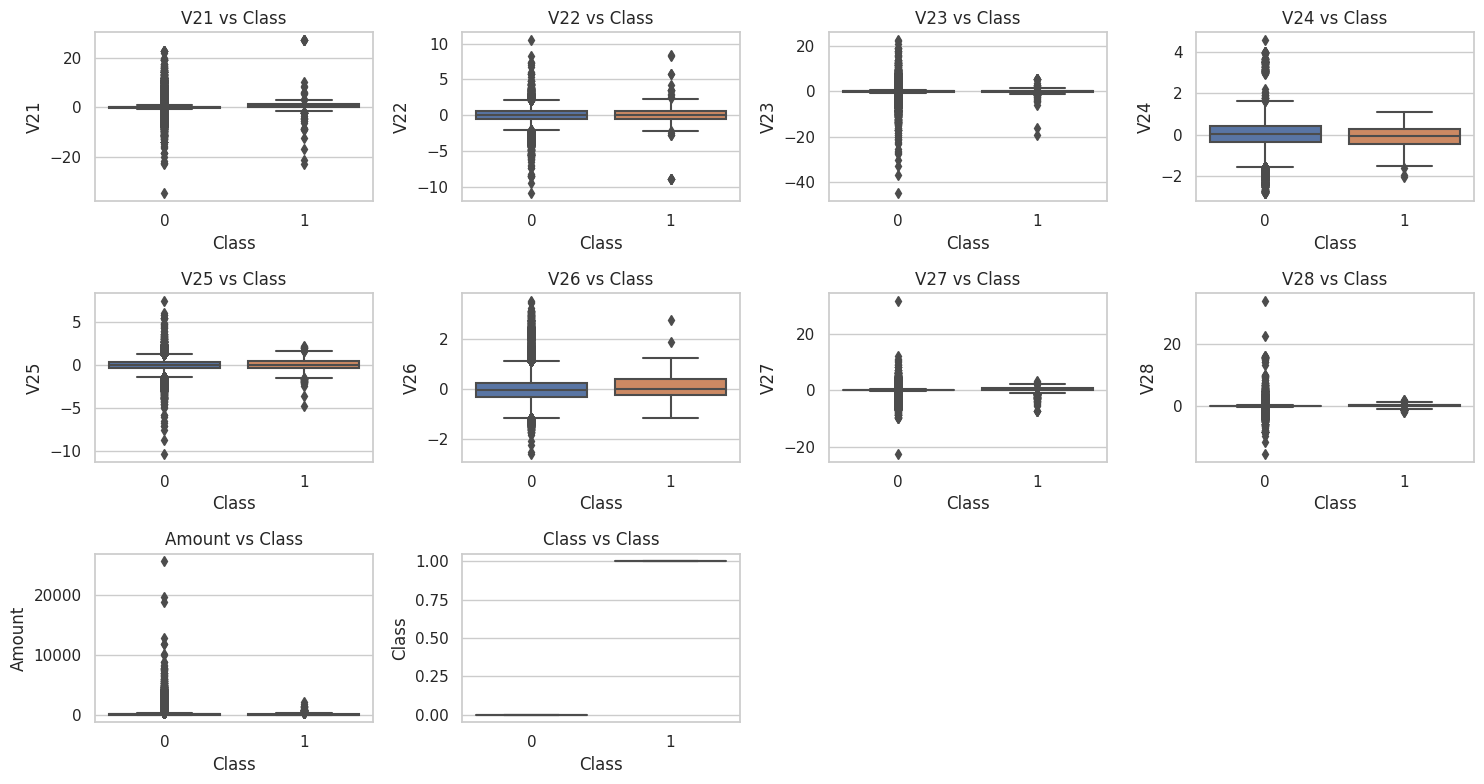

In [ ]:

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns[21:31]


sns.set(style="whitegrid")

plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x='Class', y=feature, data=df)
    plt.title(f'{feature} vs Class')

plt.tight_layout()
plt.show()

In [ ]:
from collections import Counter

def IQR_method (df,n,features):
    """
    Takes a dataframe and returns an index list corresponding to the observations
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []

    for column in features:

        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)

        # Interquartile range (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR

        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        # appending the list of outliers
        outlier_list.extend(outlier_list_column)

    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )

    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] < Q1 - outlier_step]
    df2 = df[df[column] > Q3 + outlier_step]

    print('Total number of outliers is:', df1.shape[0]+df2.shape[0])

    return multiple_outliers


feature_list = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

In [ ]:
# detecting outliers
Outliers_IQR = IQR_method(df,1,feature_list)

Total number of outliers is: 31904


If we remove outliers, we'll lose many Class 1 observations, so we've chosen to keep them

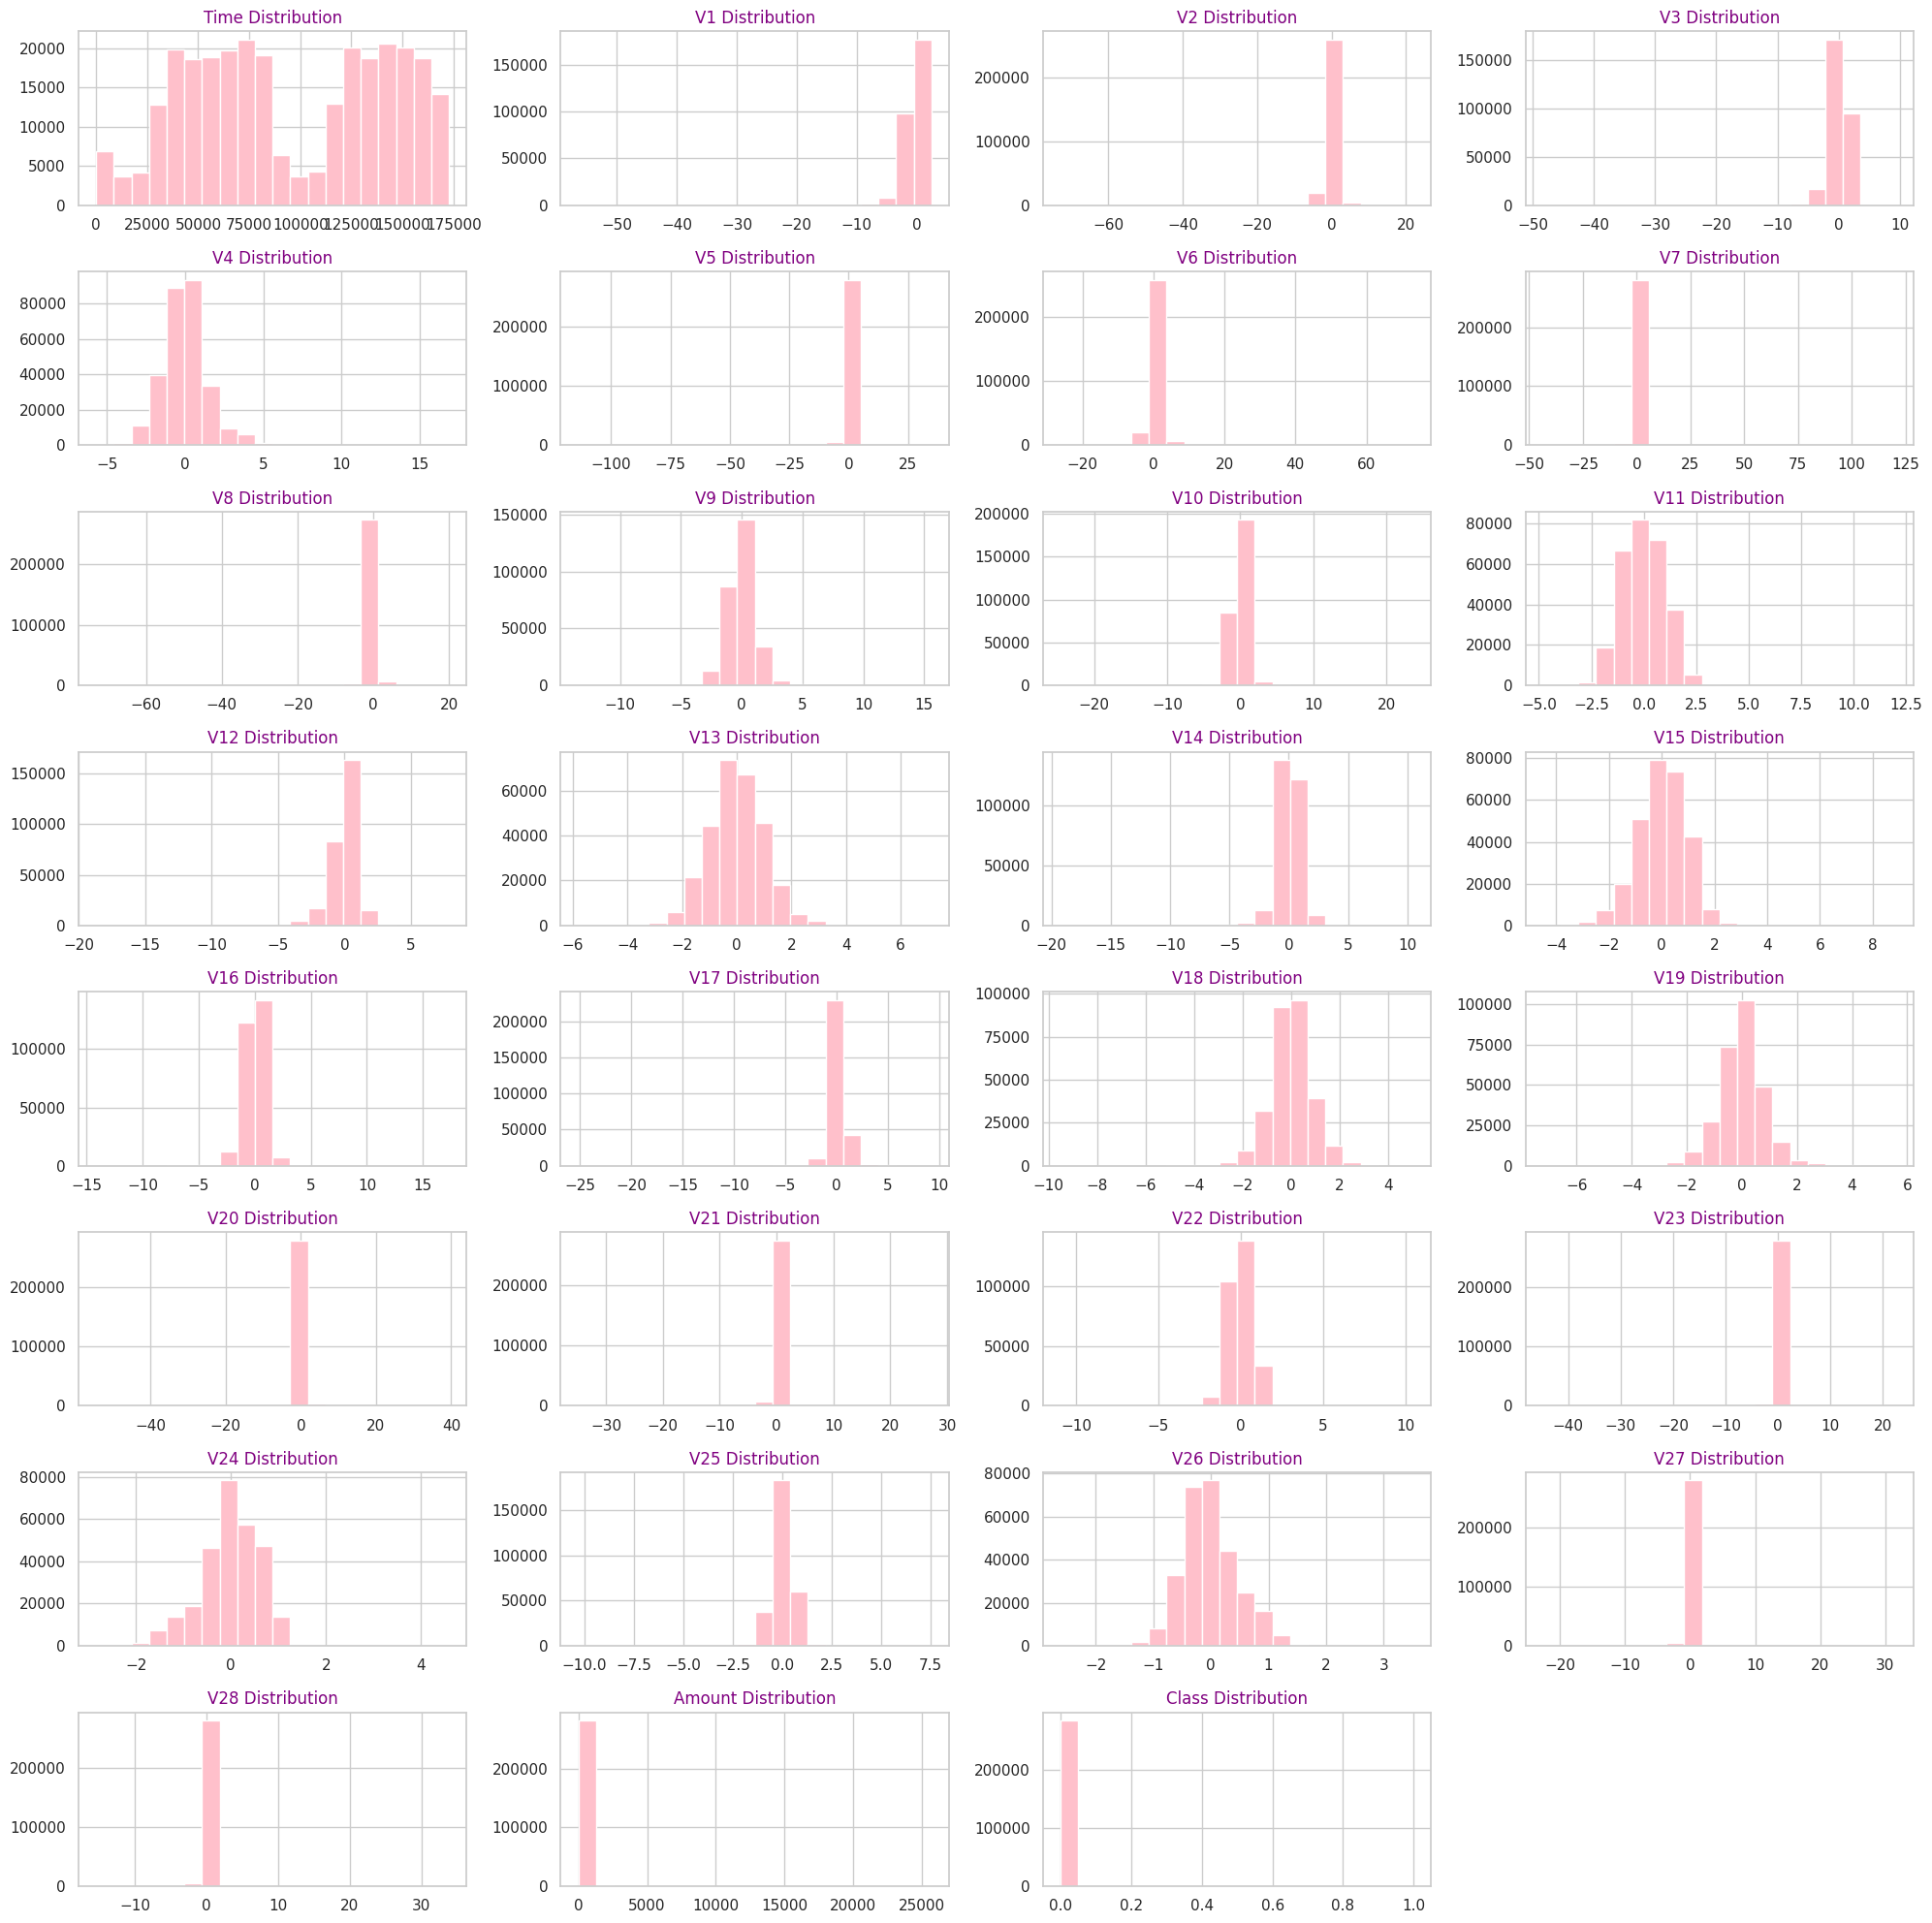

In [ ]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='pink')
        ax.set_title(feature+" Distribution",color='purple')
    fig.tight_layout()
    plt.show()
draw_histograms(df,df.columns,8,4)

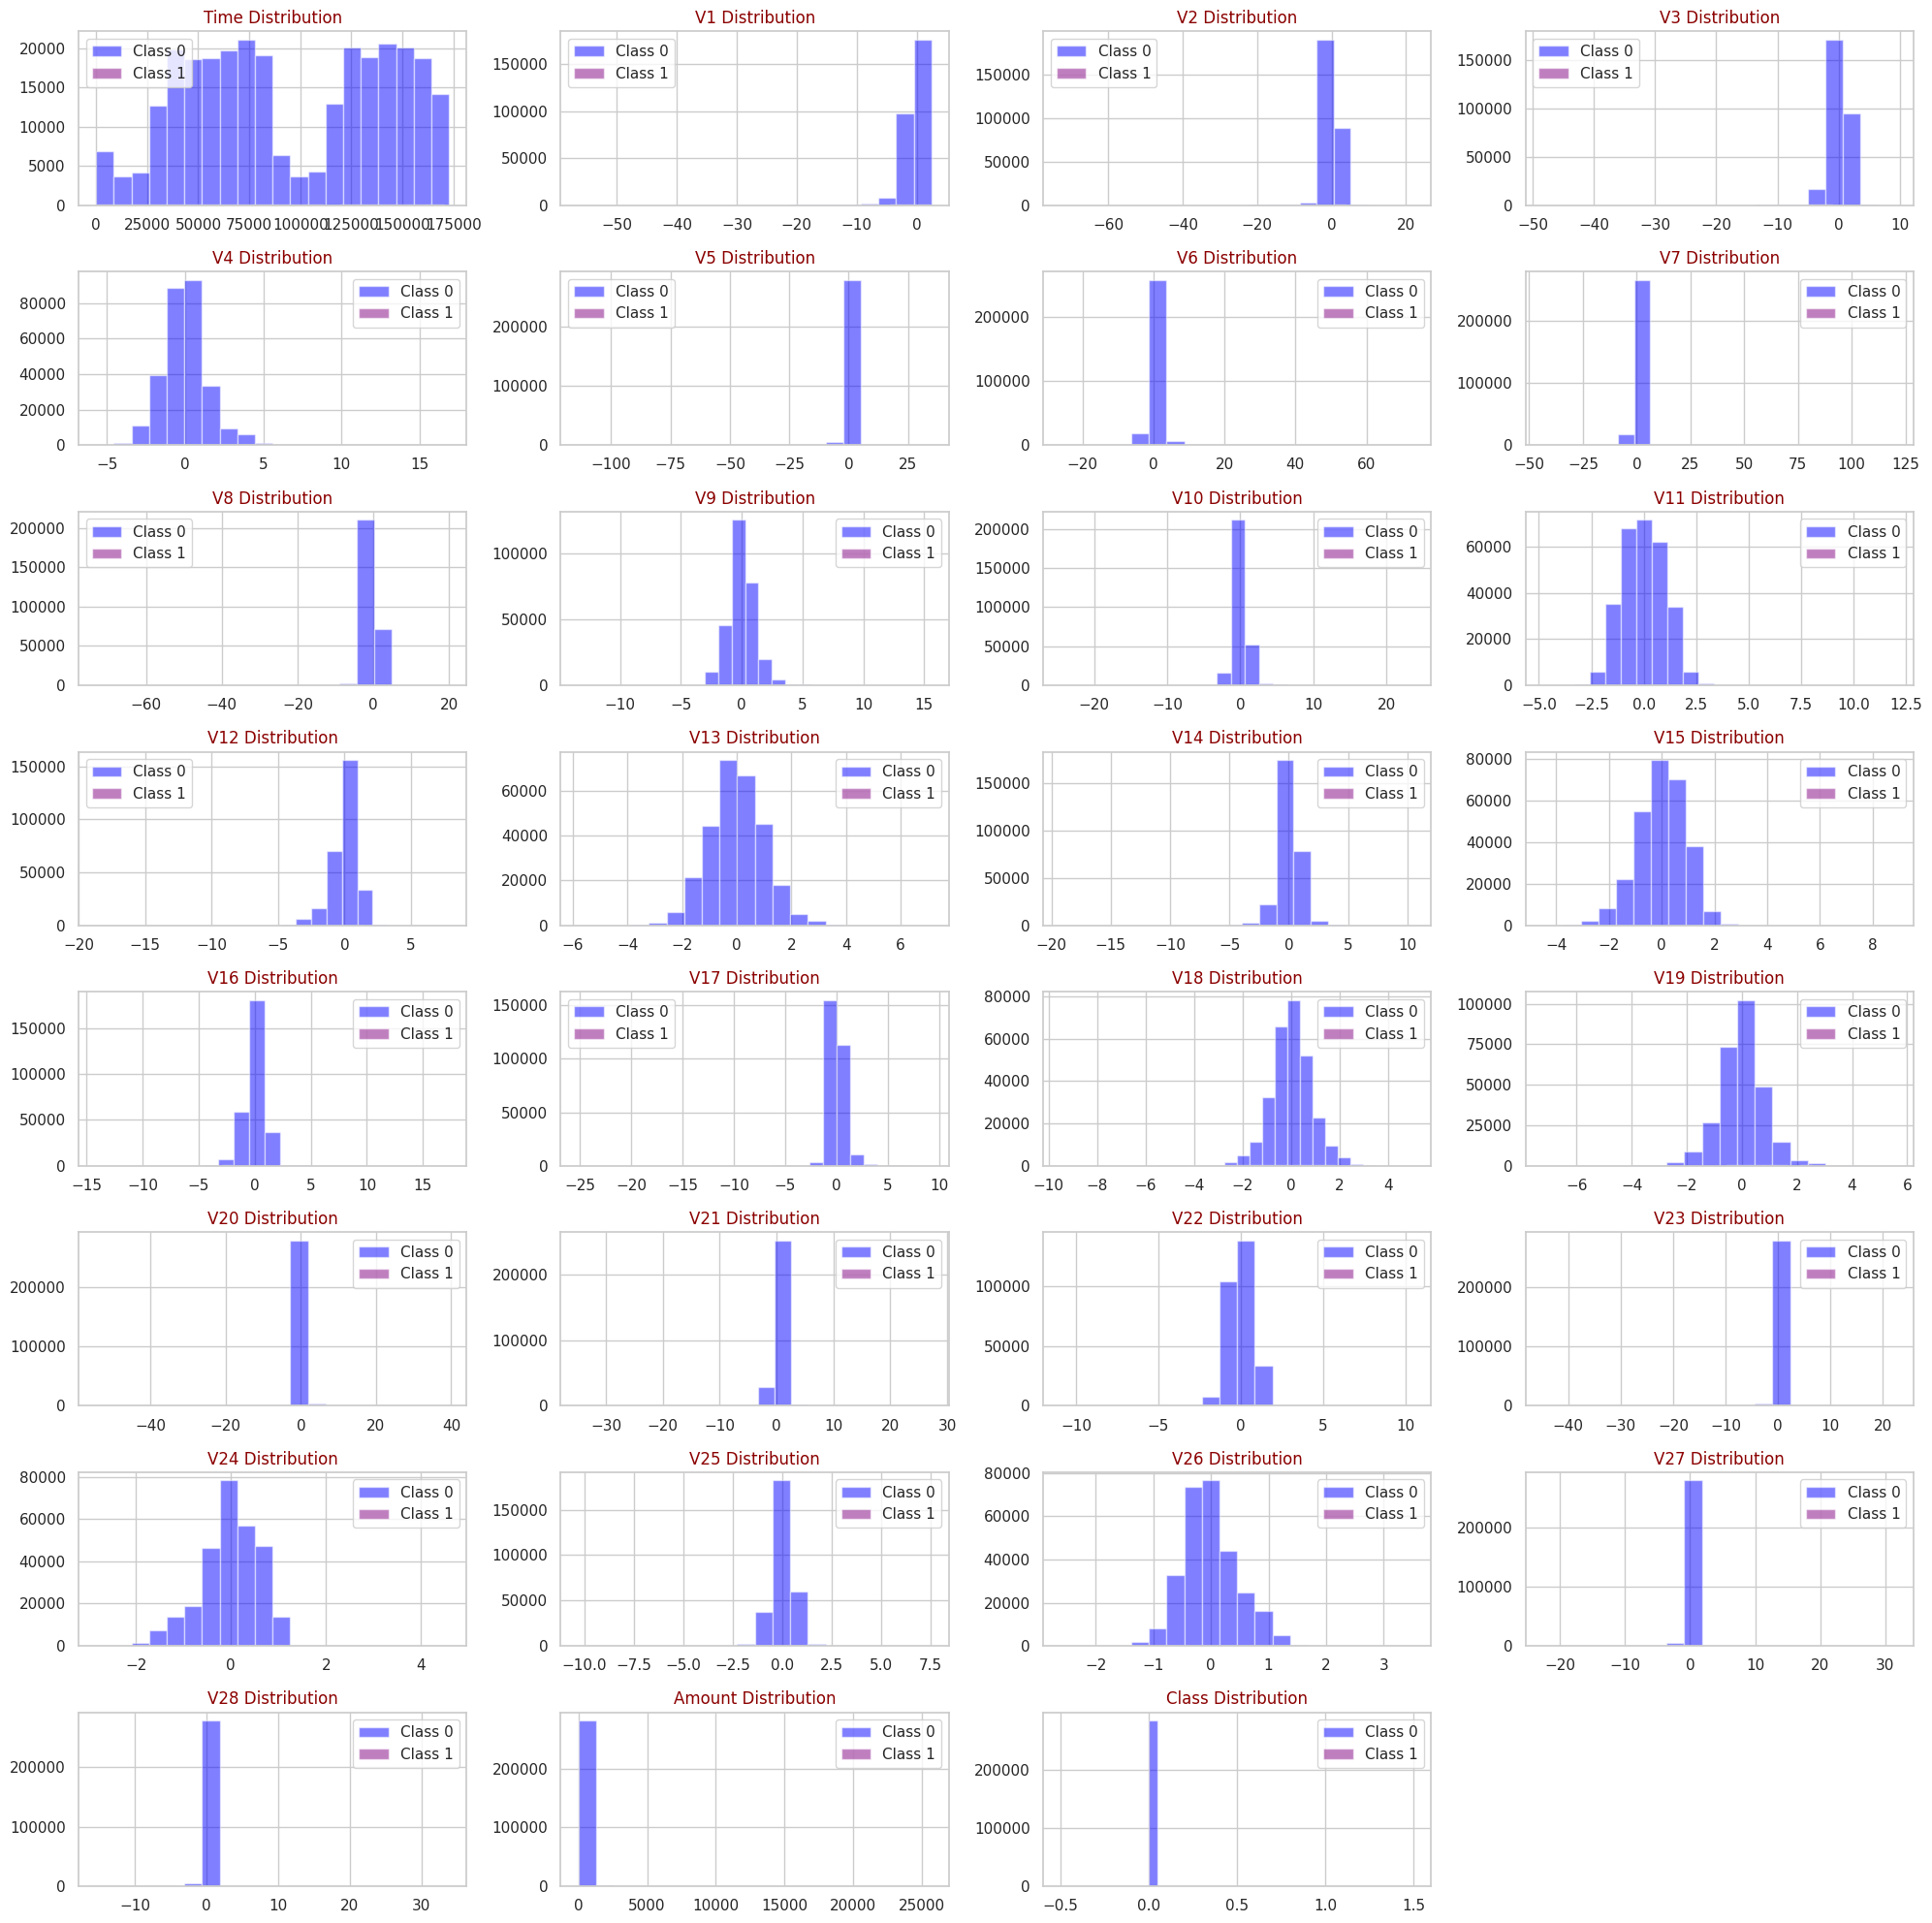

In [ ]:
def draw_histograms(dataframe, features, rows, cols):
    fig = plt.figure(figsize=(20, 20))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i + 1)
        dataframe[dataframe['Class'] == 0][feature].hist(
            bins=20, ax=ax, facecolor='blue', alpha=0.5, label='Class 0')
        dataframe[dataframe['Class'] == 1][feature].hist(
            bins=20, ax=ax, facecolor='purple', alpha=0.5, label='Class 1')
        ax.set_title(feature + " Distribution", color='DarkRed')
        ax.legend()
    fig.tight_layout()
    plt.show()


draw_histograms(df, df.columns, 8, 4)
# since we have very few class 1 observations we can not see anything clear from this plot

In [ ]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

<Axes: >

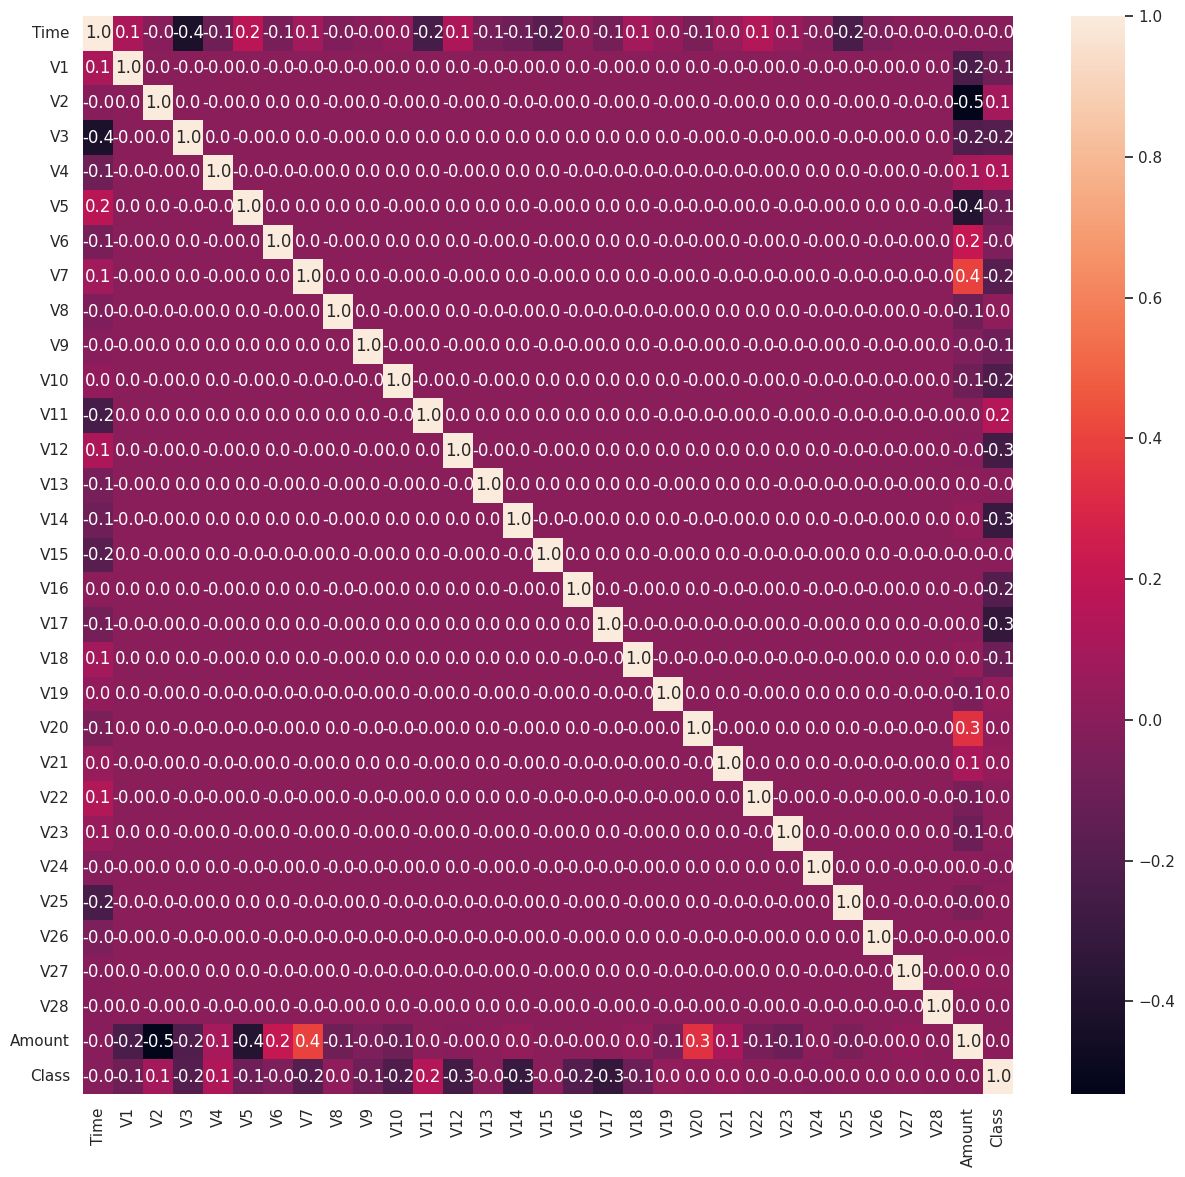

In [ ]:
plt.figure(figsize=(15, 14))
sns.heatmap(df.corr(), annot=True, fmt=".1f")

---
---


## 2. Data Preprocessing

#### Train - Test Split

In [ ]:
X=df.drop('Class', axis=1)
y=df['Class']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=111)

## Train-Test Validation Checks
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_train_test_validation.html

In [ ]:
import sys
!{sys.executable} -m pip install deepchecks -U --quiet

In [ ]:
output_col = 'Class'
train_ds, test_ds = train_test_split(df, stratify=df [output_col], test_size=0.30,random_state=111)

In [ ]:
train_deepcheck = Dataset(train_ds, label=output_col, cat_features=[])
test_deepcheck = Dataset(test_ds, label=output_col, cat_features=[ ])

In [ ]:
from deepchecks.tabular.suites import train_test_validation

validation_suite = train_test_validation()
suite_result = validation_suite.run(train_deepcheck, test_deepcheck)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result

<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2023 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Train Test Validation Suite

from deepchecks documentation about PPS :
"What is a problematic result?
Features with a high predictive score - can indicate that there is a leakage between the label and the feature, meaning that the feature holds information that is somewhat based on the label to begin with.

For example: a bank uses their loans database to create a model of whether a customer will be able to return a loan. One of the features they extract is “number of late payments”. It is clear this feature will have a very strong prediction power on the customer’s ability to return his loan, but this feature is based on data the bank knows only after the loan is given, so it won’t be available during the time of the prediction, and is a type of leakage."
_________________________
A high difference between the PPS scores of a certain feature in the train and in the test datasets - this is an indication for a drift between the relation of the feature and the label and a possible leakage in one of the datasets.

For example: a coffee shop chain trained a model to predict the number of coffee cups ordered in a store, and the model was trained on data from a specific state, and tested on data from all states. Running the Feature Label Correlation check on this split found that there was a high difference in the PPS score of the feature “time_in_day” - it had a much higher predictive power on the training data than on the test data. Investigating this topic led to detection of the problem - the time in day was saved in UTC time for all states, which made the feature much less indicative for the test data as it had data from several time zones (and much more coffee cups are ordered in during the morning/noon than during the evening/night time). This was fixed by changing the feature to be the time relative to the local time zone, thus fixing its predictive power and improving the model’s overall performance.

In [ ]:
df_checked=df.drop(['V11','V3','V12','V10'], axis=1).reset_index(drop=True)

In [ ]:
X_checked=df_checked.drop('Class', axis=1)
y_checked=df_checked['Class']

In [ ]:
X_train_c,X_test_c,y_train_c,y_test_c=train_test_split(X_checked,y_checked,test_size=0.30,random_state=111)
#We tested our models using this train-test split, but it didn't change much. So, we stuck with our original data for the next steps.

---
---


## 3. Model Building
It was previously stated that you need to make class prediction with four different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset, we can use undersampling and oversampling or class weight and optimum thresold techniques.

### Logistic Regression

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating and Tuning*
   
   *iv. Plot Precision and Recall Curve*

***i. Import Libraries***

In [ ]:
# We chose the F1 score as our metric, considering the imbalanced dataset.
# F1 score harmonizes precision and recall, offering a reliable evaluation metric
# in scenarios with uneven class distribution.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

***ii. Model Training***

In [ ]:
sc = RobustScaler()

lr = LogisticRegression(max_iter = 1000)

operations = [("scaler", sc), ("logistic", lr)]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('logistic', LogisticRegression(max_iter=1000))])

***iii. Prediction and Model Evaluating  and Tuning***

In [ ]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[85268    22]
 [   50   103]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85290
           1       0.82      0.67      0.74       153

    accuracy                           1.00     85443
   macro avg       0.91      0.84      0.87     85443
weighted avg       1.00      1.00      1.00     85443


Train_Set
[[199001     24]
 [   123    216]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199025
           1       0.90      0.64      0.75       339

    accuracy                           1.00    199364
   macro avg       0.95      0.82      0.87    199364
weighted avg       1.00      1.00      1.00    199364



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
    roc_auc_score,
)

f1_fraud = make_scorer(f1_score, average=None, labels=[1])
precision_fraud = make_scorer(precision_score, average=None, labels=[1])
recall_fraud = make_scorer(recall_score, average=None, labels=[1])


scoring = {
    "f1_fraud": f1_fraud,
    "precision_fraud": precision_fraud,
    "recall_fraud": recall_fraud,
}

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate

operations = [("scaler", sc), ("logistic", lr)]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(
    pipe_model,
    X_train,
    y_train,
    scoring=scoring,
    cv=10,
    return_train_score=True,
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()

fit_time                 5.544631
score_time               0.115524
test_f1_fraud            0.730934
train_f1_fraud           0.751810
test_precision_fraud     0.896109
train_precision_fraud    0.904897
test_recall_fraud        0.622460
train_recall_fraud       0.643070
dtype: float64


You're evaluating "accuracy score"? Is your performance metric reflect real success? You may need to use different metrics to evaluate performance on unbalanced data. You should use **[precision and recall metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.)**.

***iv. Plot Precision and Recall Curve***


In [ ]:
%pip install scikit-plot

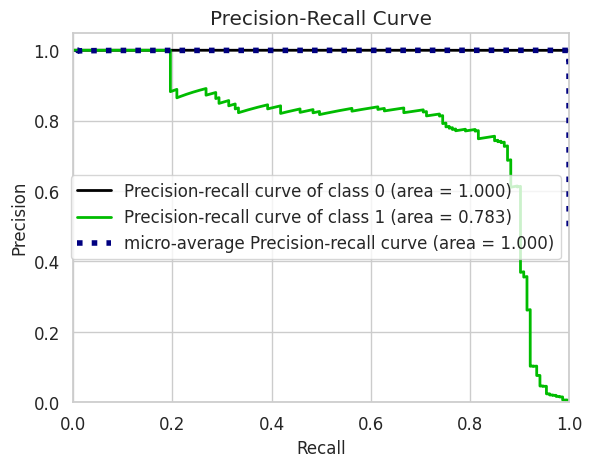

In [ ]:
from scikitplot.metrics import plot_precision_recall, plot_roc, precision_recall_curve
y_pred_proba = pipe_model.predict_proba(X_test)
plot_precision_recall(y_test, y_pred_proba)
plt.show();

### Logistic Regression with Unbalanced Data Techniques

***Improve Class Imbalance using Class Weights***

In [ ]:
#Here we will try diffrent class wights
from sklearn.model_selection import GridSearchCV, StratifiedKFold
lr = LogisticRegression(solver='newton-cg')

#Setting the range for class weights
weights = np.linspace(0.0,0.99,100)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr,
                          param_grid= param_grid,
                          cv=StratifiedKFold(),
                          n_jobs=-1,
                          scoring='f1',
                          verbose=2).fit(X_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:211: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.



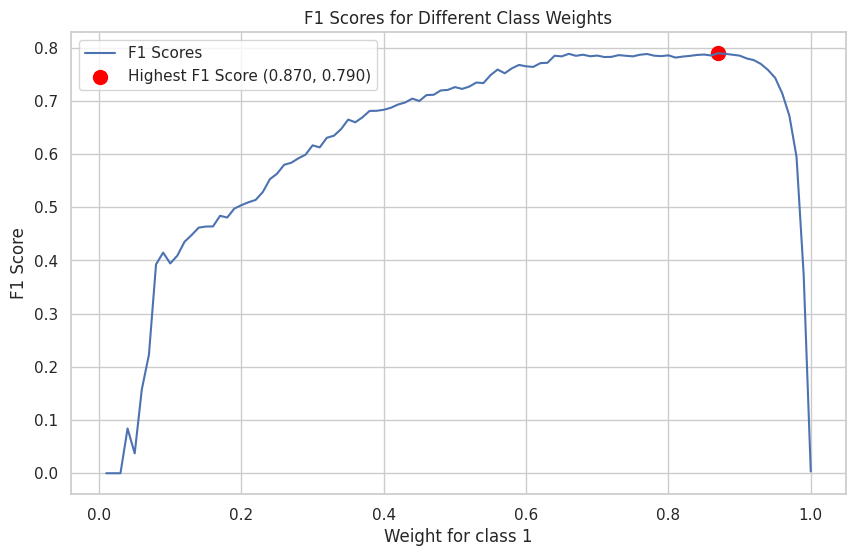

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting the weights and F1 scores from gridsearch results
weights = [param['class_weight'][1] for param in gridsearch.cv_results_['params']]
f1_scores = gridsearch.cv_results_['mean_test_score']

# Finding the index of the maximum F1 score
max_score_index = f1_scores.argmax()
highest_weight = weights[max_score_index]
highest_score = f1_scores[max_score_index]

# Plotting the F1 scores against class weights
plt.figure(figsize=(10, 6))
sns.lineplot(x=weights, y=f1_scores, label='F1 Scores')
plt.scatter(highest_weight, highest_score, color='red', s=100, label=f'Highest F1 Score ({highest_weight:.3f}, {highest_score:.3f})')
plt.xlabel('Weight for class 1')
plt.ylabel('F1 Score')
plt.title('F1 Scores for Different Class Weights')
plt.legend()
plt.grid(True)
plt.show()


***ii. Model Training***

In [ ]:
sc = RobustScaler()

weighted_lr = LogisticRegression( class_weight={0: 0.13, 1: 0.87})

operations = [("scaler", sc), ("logistic_regression", weighted_lr)]

weighted_lr_model = Pipeline(steps=operations)

weighted_lr_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('logistic_regression',
                 LogisticRegression(class_weight={0: 0.13, 1: 0.87}))])

***Prediction and Model Evaluating and Tuning***

In [ ]:
eval_metric(weighted_lr_model, X_train, y_train, X_test, y_test)

Test_Set
[[85247    43]
 [   22   131]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85290
           1       0.75      0.86      0.80       153

    accuracy                           1.00     85443
   macro avg       0.88      0.93      0.90     85443
weighted avg       1.00      1.00      1.00     85443


Train_Set
[[198958     67]
 [    70    269]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199025
           1       0.80      0.79      0.80       339

    accuracy                           1.00    199364
   macro avg       0.90      0.90      0.90    199364
weighted avg       1.00      1.00      1.00    199364



 there is a slight indication of overfitting : the test set's precision and recall for class 1 (fraudulent transactions) are slightly lower than those on the training set.

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate

weighted_lr = LogisticRegression(solver='newton-cg', class_weight={0: 0.13, 1: 0.87})

operations = [("scaler", sc), ("logistic", weighted_lr)]

scores = cross_validate(
    weighted_lr_model,
    X_train,
    y_train,
    scoring=scoring,
    cv=10,
    return_train_score=True,
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()

fit_time                 2.904555
score_time               0.049421
test_f1_fraud            0.785735
train_f1_fraud           0.795935
test_precision_fraud     0.798672
train_precision_fraud    0.799476
test_recall_fraud        0.784492
train_recall_fraud       0.792525
dtype: float64

after applying cross validation the stability across F1 scores, precision, and recall for fraudulent transactions between training and test sets
suggests a reliable generalization of the model's ability to identify fraud across different dataset subsets.


***iv.  Plot Precision and Recall Curve***


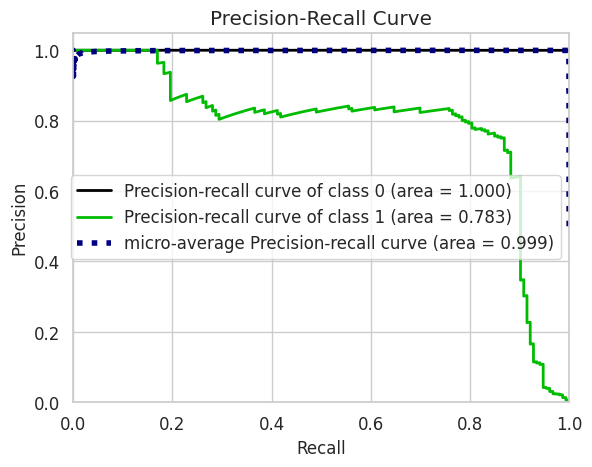

In [ ]:
from scikitplot.metrics import plot_precision_recall, plot_roc, precision_recall_curve
y_pred_proba = weighted_lr_model.predict_proba(X_test)
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
pip install imblearn --ignore-installed scikit-learn

  Using cached scikit_learn-1.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.8 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 61.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 34.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
deepchecks 0.17.5 requires scipy<=1.10.1,>=1.4.1, but you have scipy 1.11.4 which is incompatible.


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE

In [ ]:
borderline_smote = BorderlineSMOTE()

X_train_resampled, y_train_resampled =borderline_smote.fit_resample(X_train, y_train)

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7aad56eb5ea0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 847, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 984, in _make_controller_from_path
    lib_controller = controller_class(filepath=filepath, prefix=prefix)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 111, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error
Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7aad56eb5ea0>
T

In [ ]:
print("After Borderline SMOTE:", Counter(y_train_resampled))

After Borderline SMOTE: Counter({0: 199025, 1: 199025})


In [ ]:
sc = RobustScaler()

lr = LogisticRegression(solver='newton-cg', class_weight={0: 0.13, 1: 0.87})

operations = [("scaler", sc), ("logistic", lr)]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('scaler', RobustScaler()),
                ('logistic',
                 LogisticRegression(class_weight={0: 0.13, 1: 0.87},
                                    solver='newton-cg'))])

In [ ]:
eval_metric(pipe_model, X_train_resampled, y_train_resampled, X_test, y_test)

Test_Set
[[84249  1041]
 [   13   140]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85290
           1       0.12      0.92      0.21       153

    accuracy                           0.99     85443
   macro avg       0.56      0.95      0.60     85443
weighted avg       1.00      0.99      0.99     85443


Train_Set
[[196625   2400]
 [   356 198669]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    199025
           1       0.99      1.00      0.99    199025

    accuracy                           0.99    398050
   macro avg       0.99      0.99      0.99    398050
weighted avg       0.99      0.99      0.99    398050



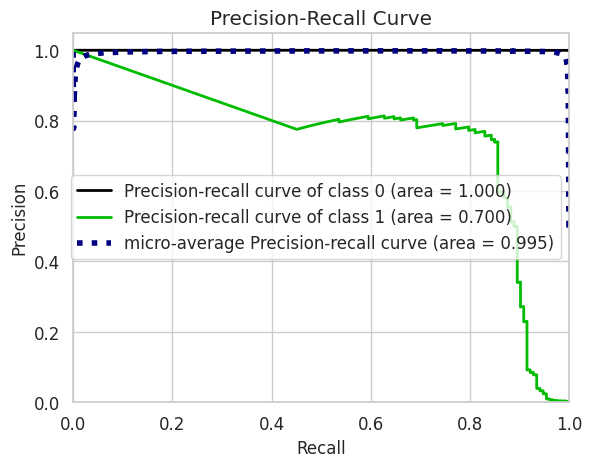

In [ ]:
from scikitplot.metrics import plot_precision_recall, plot_roc, precision_recall_curve
y_pred_proba = pipe_model.predict_proba(X_test)
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter


ratio = 0.02

# Calculate the majority class (class 0) count
majority_class_count = sum(y_train == 0)

# Calculate the minority class (class 1) count based on the desired ratio
minority_class_count = int(majority_class_count * ratio)

# Define the desired sampling strategy
sampling_strategy = {0: majority_class_count, 1: minority_class_count}

# Instantiate the Borderline SMOTE with the desired sampling strategy
borderline_smote = BorderlineSMOTE(sampling_strategy=sampling_strategy)

# Display class distribution before applying Borderline SMOTE
print("Before Borderline SMOTE:", Counter(y_train))

# Apply Borderline SMOTE to the data
X_train_resampled, y_train_resampled = borderline_smote.fit_resample(X_train, y_train)

# Display class distribution after applying Borderline SMOTE
print("After Borderline SMOTE:", Counter(y_train_resampled))


Before Borderline SMOTE: Counter({0: 199025, 1: 339})
After Borderline SMOTE: Counter({0: 199025, 1: 3980})


In [ ]:
sc = RobustScaler()

lr = LogisticRegression(solver='newton-cg')

operations = [("scaler", sc), ("logistic", lr)]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('scaler', RobustScaler()),
                ('logistic', LogisticRegression(solver='newton-cg'))])

In [ ]:
eval_metric(pipe_model, X_train_resampled, y_train_resampled, X_test, y_test)

Test_Set
[[85250    40]
 [   27   126]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85290
           1       0.76      0.82      0.79       153

    accuracy                           1.00     85443
   macro avg       0.88      0.91      0.89     85443
weighted avg       1.00      1.00      1.00     85443


Train_Set
[[198970     55]
 [   239   3741]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199025
           1       0.99      0.94      0.96      3980

    accuracy                           1.00    203005
   macro avg       0.99      0.97      0.98    203005
weighted avg       1.00      1.00      1.00    203005



here i tried diffrent ratios and i noticed it cause an overfit as i increese the ratio until i reached

### Random Forest Classifier with Unbalanced Data Techniques
   

***i. Model Training***

In [ ]:

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


operations = [("scaler", sc),
              ("RF_model", RandomForestClassifier(random_state=101,class_weight={0: 0.13, 1: 0.87},max_depth=7, max_features=4,
                       max_samples=0.8, min_samples_leaf=2, n_estimators=50, ))]

RF_model = Pipeline(steps=operations)

RF_model.fit(X_train, y_train)
# here I tried diffrent paramiters and notice their effect befor applying gridsearch in next step

Pipeline(steps=[('scaler', StandardScaler()),
                ('RF_model',
                 RandomForestClassifier(class_weight={0: 0.13, 1: 0.87},
                                        max_depth=7, max_features=4,
                                        max_samples=0.8, min_samples_leaf=2,
                                        n_estimators=50, random_state=101))])

In [ ]:
eval_metric(RF_model, X_train, y_train, X_test, y_test)

Test_Set
[[85267    23]
 [   28   125]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85290
           1       0.84      0.82      0.83       153

    accuracy                           1.00     85443
   macro avg       0.92      0.91      0.92     85443
weighted avg       1.00      1.00      1.00     85443


Train_Set
[[199011     14]
 [    64    275]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199025
           1       0.95      0.81      0.88       339

    accuracy                           1.00    199364
   macro avg       0.98      0.91      0.94    199364
weighted avg       1.00      1.00      1.00    199364



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

param_grid = {
    'RF_model__max_depth': [5, 7, 10],
    'RF_model__min_samples_leaf': [1, 2, 4],
}


sc = StandardScaler()
rf_classifier = RandomForestClassifier(random_state=101, class_weight={0: 0.13, 1: 0.87}, n_estimators=50, max_features=4, max_samples=0.8)

operations = [("scaler", sc), ("RF_model", rf_classifier)]
RF_model = Pipeline(steps=operations)

grid_search = GridSearchCV(estimator=RF_model, param_grid=param_grid, cv=5, scoring='f1', verbose=1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'RF_model__max_depth': 10, 'RF_model__min_samples_leaf': 1}
Best Score: 0.8369554249136113


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


operations = [("scaler", sc),
              ("RF_Model_Best_Parameters", RandomForestClassifier(random_state=101,class_weight={0: 0.13, 1: 0.87},max_depth=10,
                       min_samples_leaf=1,  ))]

RF_model_bp = Pipeline(steps=operations)

RF_model_bp.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('RF_Model_Best_Parameters',
                 RandomForestClassifier(class_weight={0: 0.13, 1: 0.87},
                                        max_depth=10, random_state=101))])

***ii. Prediction and Model Evaluating and Tuning***

In [ ]:
eval_metric(RF_model_bp, X_train, y_train, X_test, y_test)

Test_Set
[[85280    10]
 [   24   129]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85290
           1       0.93      0.84      0.88       153

    accuracy                           1.00     85443
   macro avg       0.96      0.92      0.94     85443
weighted avg       1.00      1.00      1.00     85443


Train_Set
[[199023      2]
 [    58    281]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199025
           1       0.99      0.83      0.90       339

    accuracy                           1.00    199364
   macro avg       1.00      0.91      0.95    199364
weighted avg       1.00      1.00      1.00    199364



In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate
operations = [("scaler", sc),
              ("RF_model", RandomForestClassifier(random_state=101,class_weight={0: 0.13, 1: 0.87},max_depth=10,
                       min_samples_leaf=1,  ))]

RF_model_bp = Pipeline(steps=operations)

scores = cross_validate(
    RF_model_bp,
    X_train,
    y_train,
    scoring=scoring,
    cv=10,
    return_train_score=True,
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()

fit_time                 178.801474
score_time                 0.204799
test_f1_fraud              0.836302
train_f1_fraud             0.903414
test_precision_fraud       0.934780
train_precision_fraud      0.994098
test_recall_fraud          0.761052
train_recall_fraud         0.827925
dtype: float64

The F1 score, precision, and recall metrics are notably higher on the training set compared to the test set, indicating potential overfitting

***iii. Plot Precision and Recall Curve***


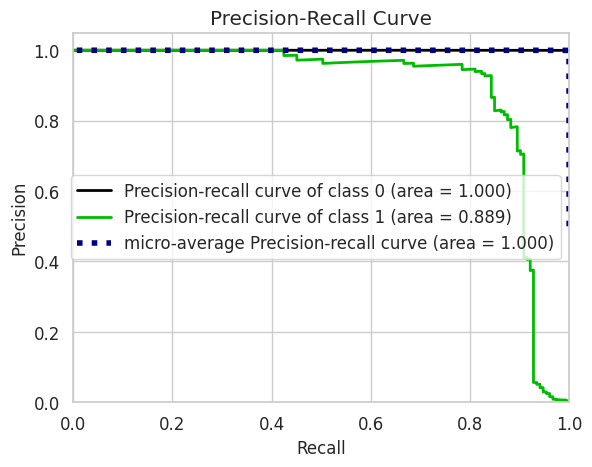

In [ ]:
from scikitplot.metrics import plot_precision_recall, plot_roc, precision_recall_curve
y_pred_proba = RF_model_bp.predict_proba(X_test)
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:

# Extract feature importances
feature_importances = RF_model_bp['RF_Model_Best_Parameters'].feature_importances_
feature_importance_dict = dict(zip(X_train.columns, feature_importances))

# Sort feature importances in descending order
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Display or work with the sorted features
for feature, importance in sorted_features:
    print(f"Feature: {feature}, Importance: {importance}")


Feature: V14, Importance: 0.19521298678973614
Feature: V17, Importance: 0.14407697594796848
Feature: V10, Importance: 0.11462246687746536
Feature: V12, Importance: 0.11277425969729828
Feature: V16, Importance: 0.0993510001348328
Feature: V11, Importance: 0.08824353929927159
Feature: V4, Importance: 0.055283656218331534
Feature: V18, Importance: 0.03141507108216358
Feature: V7, Importance: 0.028496100833177263
Feature: V9, Importance: 0.02679039961910798
Feature: V3, Importance: 0.01478407076289029
Feature: V5, Importance: 0.008628847484120794
Feature: V21, Importance: 0.008502170582963283
Feature: V1, Importance: 0.007096539638207728
Feature: V19, Importance: 0.005787855953874682
Feature: V20, Importance: 0.005364621480452296
Feature: Amount, Importance: 0.005364439255375027
Feature: V2, Importance: 0.005233195235073383
Feature: V28, Importance: 0.004712547791588831
Feature: V6, Importance: 0.004698535887205369
Feature: V26, Importance: 0.004657311277020041
Feature: V8, Importance: 0.0

In [ ]:
top_features = sorted_features[:10]

In [ ]:

top_feature_names = [feature[0] for feature in top_features]

X_top_features = df[top_feature_names]
y_top_features = df['Class']


In [ ]:
#  train testsplit with top 10 best features

X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_top_features, y_top_features, test_size=0.20, random_state=101)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


operations = [("scaler", sc),
              ("RF_model", RandomForestClassifier(random_state=101,class_weight={0: 0.13, 1: 0.87},max_depth=10,
                       min_samples_leaf=1,  ))]

RF_model_t = Pipeline(steps=operations)

RF_model_t.fit(X_train_t, y_train_t)

Pipeline(steps=[('scaler', StandardScaler()),
                ('RF_model',
                 RandomForestClassifier(class_weight={0: 0.13, 1: 0.87},
                                        max_depth=10, random_state=101))])

In [ ]:
eval_metric(RF_model_t, X_train_t, y_train_t, X_test_t, y_test_t)

Test_Set
[[56854     5]
 [   18    85]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56859
           1       0.94      0.83      0.88       103

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962


Train_Set
[[227438     18]
 [    60    329]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227456
           1       0.95      0.85      0.89       389

    accuracy                           1.00    227845
   macro avg       0.97      0.92      0.95    227845
weighted avg       1.00      1.00      1.00    227845



In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate
operations = [("scaler", sc),
              ("RF_model", RandomForestClassifier(random_state=101,class_weight={0: 0.13, 1: 0.87},max_depth=10,
                       min_samples_leaf=1,  ))]

RF_model_t = Pipeline(steps=operations)

scores = cross_validate(
    RF_model_t,
    X_train_t,
    y_train_t,
    scoring=scoring,
    cv=10,
    return_train_score=True,
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()

fit_time                 137.619863
score_time                 0.253238
test_f1_fraud              0.842884
train_f1_fraud             0.900226
test_precision_fraud       0.910906
train_precision_fraud      0.956383
test_recall_fraud          0.786775
train_recall_fraud         0.850330
dtype: float64

The model generalizes reasonably well to unseen data but might need further tuning to improve its performance

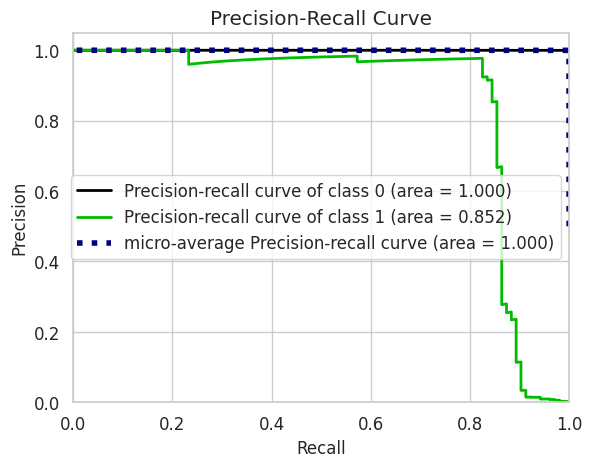

In [ ]:
from scikitplot.metrics import plot_precision_recall, plot_roc, precision_recall_curve
y_pred_proba = RF_model_t.predict_proba(X_test_t)
plot_precision_recall(y_test_t, y_pred_proba)
plt.show();

### XGBoost Classifier with Unbalanced Data Techniques

***i. Model Training***

In [ ]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier


weights_dict = {0: 0.13, 1: 0.87}

xgb_classifier = XGBClassifier(scale_pos_weight=weights_dict[0] / weights_dict[1])


xgb_pipe_model = Pipeline([("scaler", sc), ("xgboost", xgb_classifier)])

xgb_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('xgboost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

***ii. Prediction and Model Evaluating and Tuning***

In [ ]:
eval_metric(xgb_pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[85283     7]
 [   32   121]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85290
           1       0.95      0.79      0.86       153

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443


Train_Set
[[199025      0]
 [    50    289]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199025
           1       1.00      0.85      0.92       339

    accuracy                           1.00    199364
   macro avg       1.00      0.93      0.96    199364
weighted avg       1.00      1.00      1.00    199364



In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate
weights_dict = {0: 0.13, 1: 0.87}


xgb_classifier = XGBClassifier(scale_pos_weight=weights_dict[0] / weights_dict[1])


xgb_pipe_model = Pipeline([("scaler", sc), ("xgboost", xgb_classifier)])

scores = cross_validate(
    xgb_pipe_model,
    X_train,
    y_train,
    scoring=scoring,
    cv=10,
    return_train_score=True,
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()

fit_time                 5.626541
score_time               0.062833
test_f1_fraud            0.832024
train_f1_fraud           0.915768
test_precision_fraud     0.962047
train_precision_fraud    1.000000
test_recall_fraud        0.737522
train_recall_fraud       0.844639
dtype: float64

***iii. Plot Precision and Recall Curve***


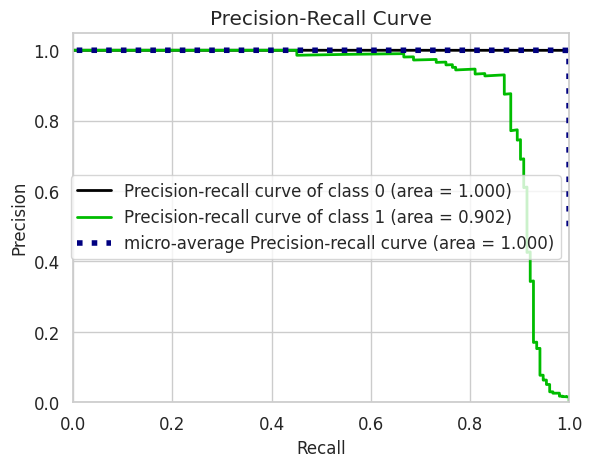

In [ ]:
from scikitplot.metrics import plot_precision_recall, plot_roc, precision_recall_curve
y_pred_proba = xgb_pipe_model.predict_proba(X_test)
plot_precision_recall(y_test, y_pred_proba)
plt.show();

### Neural Network

In the final step, you will make classification with Neural Network which is a Deep Learning algorithm.

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map.

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

You will discover **[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** your deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

***i. Import Libraries***

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV


***ii. Define Model***

In [ ]:
weights_dict = {0:1,1:590}

weights_dict
# These weights were selected to address the substantial class imbalance—590 observations in class 0
# for every 1 observation in class 1—during model training.

{0: 1, 1: 590}

In [ ]:
model = Sequential()

model.add(Dense(120, activation="relu", input_dim=30))
model.add(Dense(60, activation="relu"))
model.add(Dense(30, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

***iii. Compile Model***

In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy",  metrics=[ 'Precision', 'Recall'])

In [ ]:
operations=[('preprocess',sc),('Model',model)]
weight_model_pipe=Pipeline(steps=operations)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=10, restore_best_weights=True
)

***iv. Fit Model***

In [ ]:
weight_model_pipe.fit(
    X=X_train,
    y=y_train,
    Model__validation_split=0.2,
    Model__batch_size=64,
    Model__epochs=50,
    Model__verbose=1,
    Model__class_weight=weights_dict
)


Epoch 1/50
2493/2493 [==============================] - 15s 5ms/step - loss: 0.6271 - precision: 0.0437 - recall: 0.8476 - val_loss: 0.2526 - val_precision: 0.0380 - val_recall: 0.9571
Epoch 2/50
2493/2493 [==============================] - 10s 4ms/step - loss: 0.3909 - precision: 0.0448 - recall: 0.8996 - val_loss: 0.1769 - val_precision: 0.0280 - val_recall: 0.9571
Epoch 3/50
2493/2493 [==============================] - 7s 3ms/step - loss: 0.3266 - precision: 0.0396 - recall: 0.9219 - val_loss: 0.1496 - val_precision: 0.0329 - val_recall: 0.9571
Epoch 4/50
2493/2493 [==============================] - 9s 4ms/step - loss: 0.2660 - precision: 0.0415 - recall: 0.9368 - val_loss: 0.0809 - val_precision: 0.0827 - val_recall: 0.9571
Epoch 5/50
2493/2493 [==============================] - 9s 4ms/step - loss: 0.1697 - precision: 0.0547 - recall: 0.9517 - val_loss: 0.0303 - val_precision: 0.1531 - val_recall: 0.9429
Epoch 6/50
2493/2493 [==============================] - 9s 4ms/step - loss: 0.

Pipeline(steps=[('preprocess', StandardScaler()),
                ('Model',
                 <keras.src.engine.sequential.Sequential object at 0x7aad39b45540>)])

***v. Prediction and Model Evaluating***

In [ ]:
def evaluate_model(model, X_train, y_train, X_test, y_test, threshold=0.5, plot_confusion_matrix=True):
    # Predictions on training set
    y_train_pred_prob = model.predict(X_train)
    y_train_pred = (y_train_pred_prob > threshold).astype(int)

    # Predictions on test set
    y_test_pred_prob = model.predict(X_test)
    y_test_pred = (y_test_pred_prob > threshold).astype(int)

    # Classification reports
    train_report = classification_report(y_train, y_train_pred, target_names=['Class 0', 'Class 1'])
    test_report = classification_report(y_test, y_test_pred, target_names=['Class 0', 'Class 1'])

    print("Train Classification Report:\n", train_report)
    print("\nTest Classification Report:\n", test_report)

    # Confusion matrices
    train_conf_matrix = confusion_matrix(y_train, y_train_pred)
    test_conf_matrix = confusion_matrix(y_test, y_test_pred)

    if plot_confusion_matrix:
        # Plot confusion matrices
        plot_confusion_matrix_heatmap(train_conf_matrix, "Train Confusion Matrix")
        plot_confusion_matrix_heatmap(test_conf_matrix, "Test Confusion Matrix")

    return train_report, test_report, train_conf_matrix, test_conf_matrix

def plot_confusion_matrix_heatmap(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Class 0', 'Class 1'],
                yticklabels=['Class 0', 'Class 1'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

2671/2671 [==============================] - 4s 2ms/step
Train Classification Report:
               precision    recall  f1-score   support

     Class 0       1.00      0.99      1.00    199025
     Class 1       0.17      0.97      0.29       339

    accuracy                           0.99    199364
   macro avg       0.59      0.98      0.64    199364
weighted avg       1.00      0.99      0.99    199364


Test Classification Report:
               precision    recall  f1-score   support

     Class 0       1.00      0.99      1.00     85290
     Class 1       0.18      0.93      0.30       153

    accuracy                           0.99     85443
   macro avg       0.59      0.96      0.65     85443
weighted avg       1.00      0.99      0.99     85443



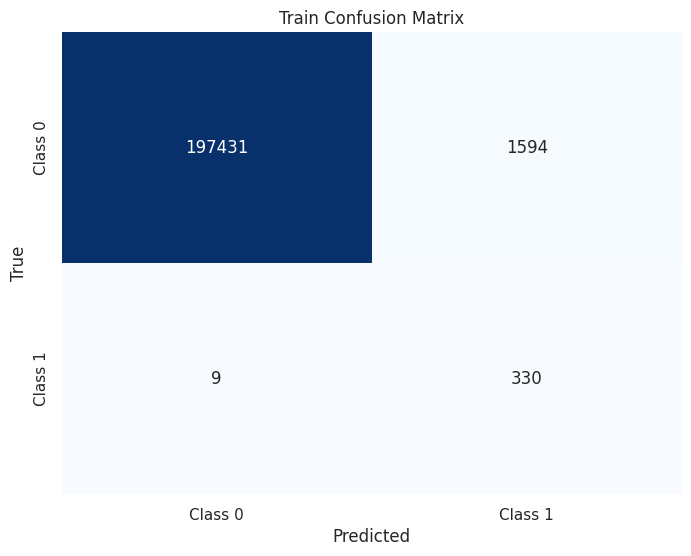

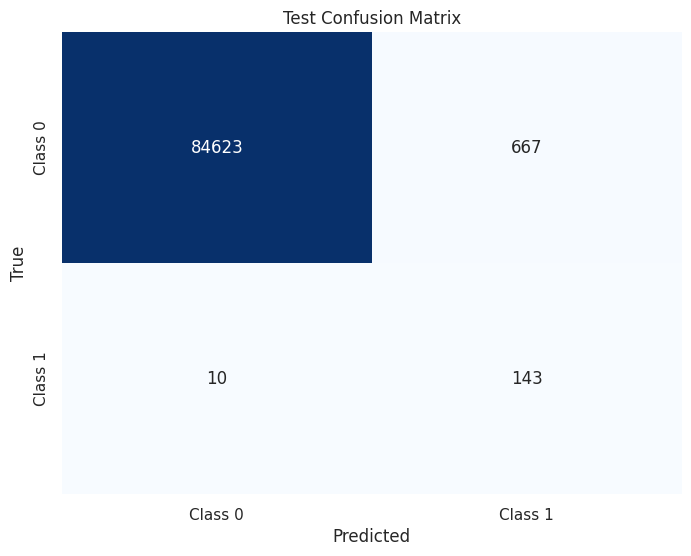

In [ ]:
train_report, test_report, train_conf_matrix, test_conf_matrix = evaluate_model(weight_model_pipe, X_train, y_train, X_test, y_test)


## 4. Model Deployement
You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to a proper IDE and create your web app with Streamlit API.

In [ ]:
sc = RobustScaler()
X_train_scaled = sc.fit(X_train)
X_test_scaled = sc.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



Best model for Recall (Class 1): logistic_regression
  Recall: 0.86
  Precision: 0.75
  F1 Score: 0.80


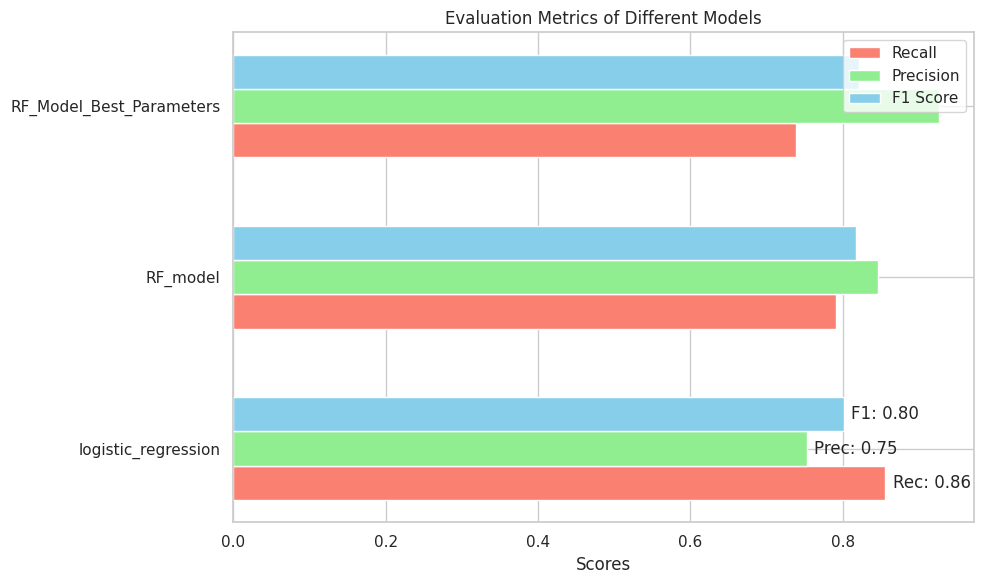

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score


pipelines = [weighted_lr, RF_model, RF_model_bp]
model_names = ['logistic_regression', 'RF_model', 'RF_Model_Best_Parameters']

f1_scores = []
precision_scores = []
recall_scores = []


for pipeline in pipelines:
    predictions = pipeline.predict(X_test_scaled)
    f1 = f1_score(y_test, predictions, pos_label=1)
    precision = precision_score(y_test, predictions, pos_label=1)
    recall = recall_score(y_test, predictions, pos_label=1)

    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)


best_index = np.argmax(recall_scores)
best_f1 = f1_scores[best_index]
best_precision = precision_scores[best_index]
best_recall = recall_scores[best_index]
best_model_name = model_names[best_index]


print(f"Best model for Recall (Class 1): {best_model_name}")
print(f"  Recall: {best_recall:.2f}")
print(f"  Precision: {best_precision:.2f}")
print(f"  F1 Score: {best_f1:.2f}")

# Plotting the evaluation metrics with recall as the main comparison
bar_width = 0.2
index = np.arange(len(model_names))

plt.figure(figsize=(10, 6))

bars_recall = plt.barh(index - bar_width, recall_scores, bar_width, color='salmon', label='Recall')
bars_precision = plt.barh(index, precision_scores, bar_width, color='lightgreen', label='Precision')
bars_f1 = plt.barh(index + bar_width, f1_scores, bar_width, color='skyblue', label='F1 Score')

plt.xlabel('Scores')
plt.title('Evaluation Metrics of Different Models')
plt.yticks(index, model_names)
plt.legend(loc='upper right')

# Annotate the best recall
plt.text(best_recall + 0.01, best_index - bar_width, f"Rec: {best_recall:.2f}", va='center', ha='left')
plt.text(best_precision + 0.01, best_index, f"Prec: {best_precision:.2f}", va='center', ha='left')
plt.text(best_f1 + 0.01, best_index + bar_width, f"F1: {best_f1:.2f}", va='center', ha='left')

plt.tight_layout()
plt.show()


### Train Best Model On The Whole Data


In [ ]:
X = df[top_feature_names]
y = df['Class']

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)


In [ ]:
sc = RobustScaler()

weighted_lr = LogisticRegression( class_weight={0: 0.13, 1: 0.87})

operations = [("scaler", sc), ("logistic_regression", weighted_lr)]

weighted_lr_model = Pipeline(steps=operations)

weighted_lr_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('logistic_regression',
                 LogisticRegression(class_weight={0: 0.13, 1: 0.87}))])

In [ ]:
eval_metric(weighted_lr_model, X_train, y_train, X_test, y_test)

Test_Set
[[56844    15]
 [   17    86]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56859
           1       0.85      0.83      0.84       103

    accuracy                           1.00     56962
   macro avg       0.93      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962


Train_Set
[[227363     93]
 [    81    308]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227456
           1       0.77      0.79      0.78       389

    accuracy                           1.00    227845
   macro avg       0.88      0.90      0.89    227845
weighted avg       1.00      1.00      1.00    227845



In [ ]:
sc = RobustScaler()

weighted_lr = LogisticRegression( class_weight={0: 0.13, 1: 0.87})

operations = [("scaler", sc), ("logistic_regression", weighted_lr)]

Final_model = Pipeline(steps=operations)

Final_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('logistic_regression',
                 LogisticRegression(class_weight={0: 0.13, 1: 0.87}))])

### Save and Export

In [ ]:
import pickle
pickle.dump(Final_model, open('final_model.pkl', 'wb'))
pickle.dump(Final_model, open('final_model', 'wb'))

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___